In [77]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(21,10)

In [78]:
df=pd.read_csv('clean_data.csv')

In [79]:
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [80]:
df.shape

(2620, 8)

In [81]:
df.groupby('builder')['builder'].agg('count')

builder
24K Realtors                         16
AKS Housing Dedvelopment Pvt Ltd     15
AKS REALTY SERVICES                   8
ARB HOMES                            59
Advaita Homes                        43
                                   ... 
mohammed                              4
seller                              484
smartassetsindia                     16
vinoth builders                       2
viswaraj                             53
Name: builder, Length: 135, dtype: int64

In [82]:
df.groupby('status')['status'].agg('count')

status
Ready to move         1487
Under Construction    1133
Name: status, dtype: int64

In [83]:
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [84]:
df1=df.dropna()
df1.shape

(580, 8)

In [85]:
df1.isnull().sum()

price       0
area        0
status      0
bhk         0
bathroom    0
age         0
location    0
builder     0
dtype: int64

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 3 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     580 non-null    float64
 1   area      580 non-null    int64  
 2   status    580 non-null    object 
 3   bhk       580 non-null    int64  
 4   bathroom  580 non-null    float64
 5   age       580 non-null    float64
 6   location  580 non-null    object 
 7   builder   580 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 40.8+ KB


# feature extracting

In [87]:
df1['price_per_sqft']=df1['price']*100000/df1['area']

<ipython-input-87-e5e78d1d290a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft']=df1['price']*100000/df1['area']


In [88]:
df1.head(5)

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders,4766.536965
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd,7190.476190
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd,8464.655561
11,240.00,1500,Ready to move,3,3.0,1.0,Anna Nagar,Pushkar Properties Pvt Ltd,16000.000000
15,113.00,2343,Ready to move,4,4.0,5.0,Navallur,Olympia Group,4822.876654


## changing name as others to the locations less than 3

In [89]:
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Veppampattu        111
Perungudi           34
Iyyappanthangal     34
Vadanemmeli         28
Pallavaram          24
                  ... 
Kumananchavadi       1
Koyambedu            1
Kovur                1
Pammal               1
Washermanpet         1
Name: location, Length: 104, dtype: int64

In [111]:
location_lessthan_3=location_stats[location_stats<=3]
location_lessthan_3

location
Ottiyabakkam            3
Pozhichalur             3
Thiruporur              3
Kanathur Reddikuppam    3
Keelkattalai            3
                       ..
Kumananchavadi          1
Koyambedu               1
Kovur                   1
Pammal                  1
Washermanpet            1
Name: location, Length: 69, dtype: int64

In [112]:
len(df1.location.unique())

36

In [113]:
df1.location=df1.location.apply(lambda x:'other' if x in location_lessthan_3 else x)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [114]:
len(df1.location.unique())

36

In [97]:
df1.head()

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders,4766.536965
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd,7190.476190
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd,8464.655561
11,240.00,1500,Ready to move,3,3.0,1.0,Anna Nagar,Pushkar Properties Pvt Ltd,16000.000000
15,113.00,2343,Ready to move,4,4.0,5.0,Navallur,Olympia Group,4822.876654


## changing name as others to the builder  built less than 10 buildings


In [99]:
builder_stats=df1.groupby('builder')['builder'].agg('count').sort_values(ascending=False)
builder_stats

builder
seller                               134
Propsource Realty Private Limited     44
ARB HOMES                             42
Karthick                              39
JD Properties                         30
                                    ... 
Isha Homes                             1
INTERFACE PROPERTIES                   1
Dugar Housing Builders                 1
Dinesh                                 1
Lifestyle Housing                      1
Name: builder, Length: 63, dtype: int64

In [107]:
builders_lessthan_10=builder_stats[builder_stats<=10]
len(builders_lessthan_10)

49

In [108]:
len(df1.builder.unique())

63

In [109]:
df1.builder=df1.builder.apply(lambda x:'other' if x in builders_lessthan_10 else x)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
len(df1.builder.unique())

15

In [116]:
df1.head()

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,other,4766.536965
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.476190
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,other,8464.655561
11,240.00,1500,Ready to move,3,3.0,1.0,Anna Nagar,other,16000.000000
15,113.00,2343,Ready to move,4,4.0,5.0,Navallur,other,4822.876654


In [118]:
2221/3

740.3333333333334

In [125]:
df1[df1.area/df1.bhk<300].head()

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.47619
43,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.47619
567,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.47619
570,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.47619
571,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,other,7190.47619


In [126]:
df1.shape

(580, 9)

In [124]:
df2=df1[~(df1.area/df1.bhk<300)]
df2.shape

(569, 9)

In [127]:
df2.price_per_sqft.describe()

count      569.000000
mean      5876.196902
std       2958.945276
min       2200.000000
25%       3984.615385
50%       5097.513089
75%       6759.776536
max      21499.202552
Name: price_per_sqft, dtype: float64

In [128]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<+(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3=remove_outlier(df2)
df3.shape


    

(439, 9)

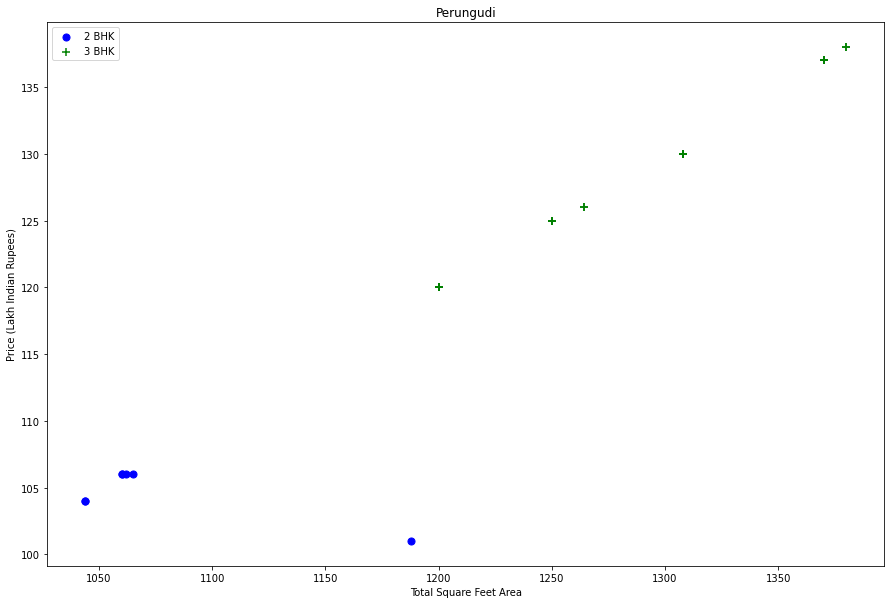

In [132]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Perungudi")

In [133]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(377, 9)

Text(0, 0.5, 'Count')

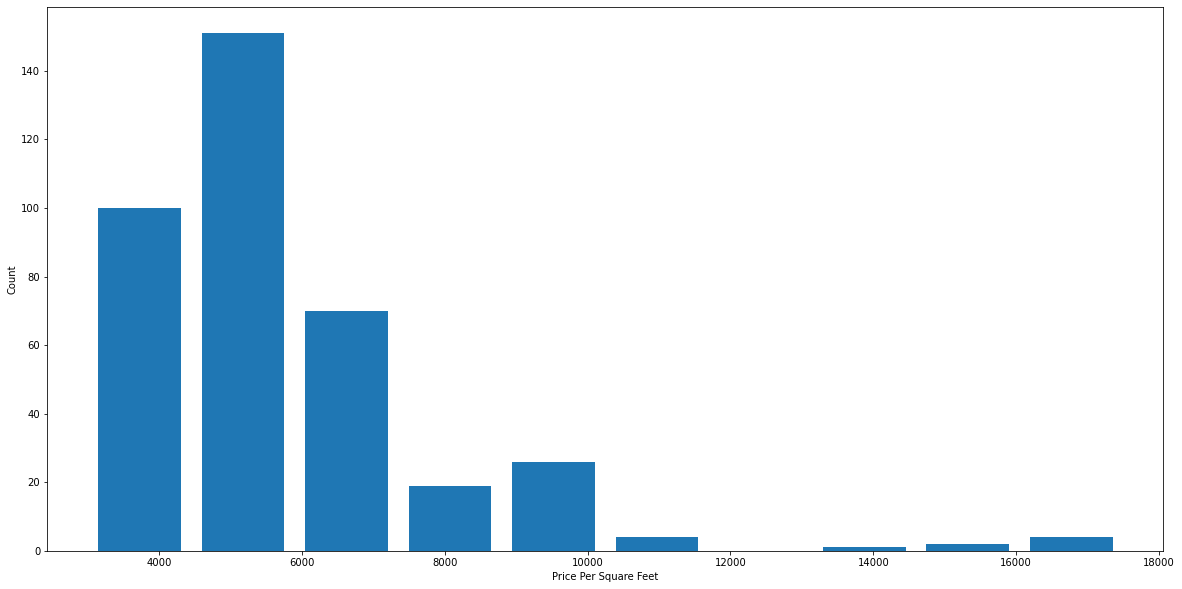

In [134]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature


Text(0, 0.5, 'Count')

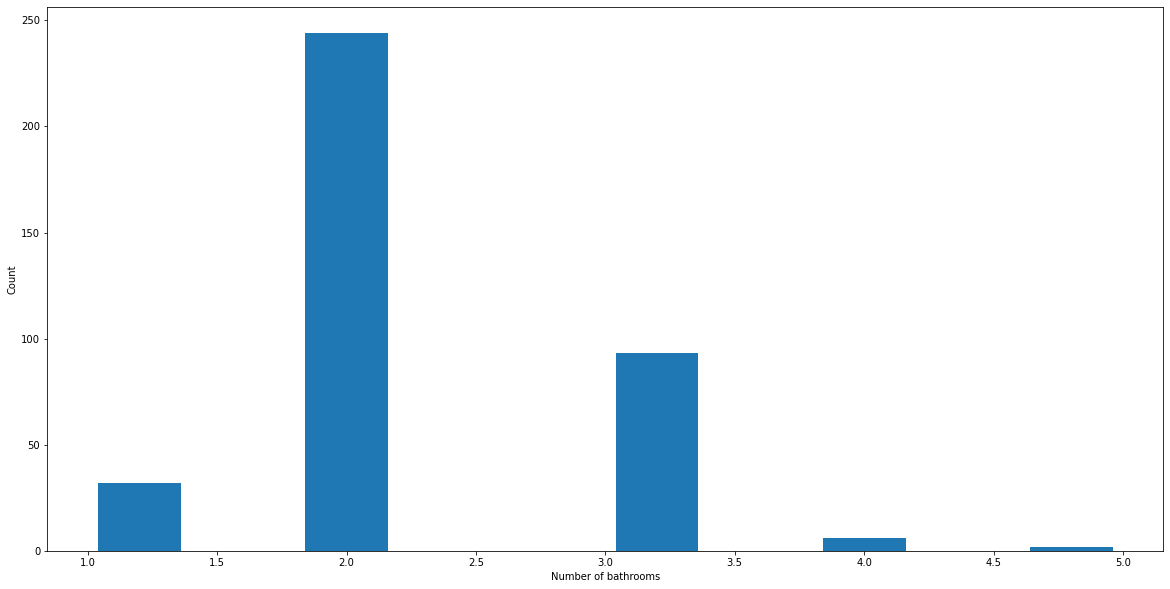

In [136]:
plt.hist(df4.bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home



In [142]:
len(df4[df4.bathroom>df4.bhk+1])

0

In [143]:
df4.head()

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
0,75.0,1655,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,4531.722054
1,100.0,2100,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,4761.904762
2,95.0,2000,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,4750.000000
3,90.0,1900,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,4736.842105
4,85.0,1800,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,4722.222222


In [145]:
df5 = df4.drop(['price_per_sqft'],axis='columns')
df5.head(3)

,price,area,status,bhk,bathroom,age,location,builder
0,75.0,1655,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation
1,100.0,2100,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation
2,95.0,2000,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation


# Use One Hot Encoding For Location


In [146]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,Agaramthen,Ambattur,Anna Nagar,Chromepet,Elandanur,Gerugambakkam,Iyyappanthangal,Karapakkam,Kattankulathur,Kelambakkam,...,Poonamallee,Porur,Sholinganallur,T Nagar,Thirumazhisai,Vadanemmeli,Vanagaram,Vengaivasal,Veppampattu,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head()

,price,area,status,bhk,bathroom,age,location,builder,Agaramthen,Ambattur,...,Perungudi,Poonamallee,Porur,Sholinganallur,T Nagar,Thirumazhisai,Vadanemmeli,Vanagaram,Vengaivasal,Veppampattu
0,75.0,1655,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,0,0,0,0,0,0,0,0
1,100.0,2100,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,0,0,0,0,0,0,0,0
2,95.0,2000,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90.0,1900,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,0,0,0,0,0,0,0,0
4,85.0,1800,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,0,0,0,0,0,0,0,0


# Use One Hot Encoding For status,builder


In [148]:
dummies1 = pd.get_dummies(df5.status)
dummies1.head(3)

,Ready to move,Under Construction
0,1,0
1,1,0
2,1,0


In [149]:
dummies2 = pd.get_dummies(df5.builder)
dummies2.head(3)

,24K Realtors,ARB HOMES,Casagrand Builder Private Limited,JD Properties,Karthick,Kkk Landmark,MC Foundation,Pacifica Companies,Prestige Estates Projects Ltd,Propsource Realty Private Limited,Saradeuz Realty Constructions,Velan Housing Properties,other,seller,viswaraj
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [150]:
df7 = pd.concat([df6,dummies1,dummies2.drop('other',axis='columns')],axis='columns')
df7.head()

,price,area,status,bhk,bathroom,age,location,builder,Agaramthen,Ambattur,...,Karthick,Kkk Landmark,MC Foundation,Pacifica Companies,Prestige Estates Projects Ltd,Propsource Realty Private Limited,Saradeuz Realty Constructions,Velan Housing Properties,seller,viswaraj
0,75.0,1655,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,1,0,0,0,0,0,0,0
1,100.0,2100,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,1,0,0,0,0,0,0,0
2,95.0,2000,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,1,0,0,0,0,0,0,0
3,90.0,1900,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,1,0,0,0,0,0,0,0
4,85.0,1800,Ready to move,3,3.0,1.0,Agaramthen,MC Foundation,1,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
df8 = df7.drop(['location','builder','status'],axis='columns')
df8.head(2)

,price,area,bhk,bathroom,age,Agaramthen,Ambattur,Anna Nagar,Chromepet,Elandanur,...,Karthick,Kkk Landmark,MC Foundation,Pacifica Companies,Prestige Estates Projects Ltd,Propsource Realty Private Limited,Saradeuz Realty Constructions,Velan Housing Properties,seller,viswaraj
0,75.0,1655,3,3.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,100.0,2100,3,3.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Build a Model Now...

In [153]:
X = df8.drop(['price'],axis='columns')
X.head(3)

,area,bhk,bathroom,age,Agaramthen,Ambattur,Anna Nagar,Chromepet,Elandanur,Gerugambakkam,...,Karthick,Kkk Landmark,MC Foundation,Pacifica Companies,Prestige Estates Projects Ltd,Propsource Realty Private Limited,Saradeuz Realty Constructions,Velan Housing Properties,seller,viswaraj
0,1655,3,3.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2100,3,3.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2000,3,3.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [154]:
X.shape

(377, 53)

In [155]:
y = df8.price
y.head(3)

0     75.0
1    100.0
2     95.0
Name: price, dtype: float64

In [156]:
y.shape

(377,)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9071577616283037

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [159]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89799425, 0.90544312, 0.91820319, 0.84015067, 0.94139785])

We can see that in 5 iterations we get a score above 90% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV


In [160]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.900638,{'normalize': False}
1,lasso,0.733047,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.807612,"{'criterion': 'mse', 'splitter': 'random'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.



# Test the model for few properties

In [197]:
def predict_price(location,area,bathroom,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [200]:
x=input(str('Enter the location:'))
u=input('Enter the area:')
z=input('Enter the bathroom:')
w=input('Enter the bhk:')
predict_price(x,u, z, w)


Enter the location:Agaramthen
Enter the area:1000
Enter the bathroom:3
Enter the bhk:3


35.805980235054676

In [184]:
predict_price('Agaramthen',1000, 3, 3)


35.805980235054676